In [233]:
pip install torch torchvision torchaudio matplotlib tqdm


Note: you may need to restart the kernel to use updated packages.


In [234]:
import torch
print(torch.backends.mps.is_available())  # Should return True
print(torch.backends.mps.is_built())  # Should return True


True
True


In [235]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# Set device to MPS for macOS
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# Define image transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert 1-channel to 3-channel
    transforms.Resize((224, 224)),  # Resize to ResNet50 input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load FER2013 dataset
data_dir =  '/Users/prithvipandey/Documents/dataset/archive (1) 2' # Change this to the dataset path
train_dataset = datasets.ImageFolder(root=f"{data_dir}/train", transform=transform)
test_dataset = datasets.ImageFolder(root=f"{data_dir}/test", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train Samples: {len(train_dataset)}, Test Samples: {len(test_dataset)}")


Using device: mps
Train Samples: 28709, Test Samples: 7178


In [236]:
ls ~/.cache/torch/hub/checkpoints/


resnet50-0676ba61.pth  resnet50-11ad3fa6.pth


In [237]:
mv resnet50-0676ba61.pth ~/.cache/torch/hub/checkpoints/


mv: resnet50-0676ba61.pth: No such file or directory


In [238]:
# Import necessary modules
import torch
import torch.nn as nn
from torchvision import models  # Import models module

# Load pretrained ResNet-50 model
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 7)  # FER2013 has 7 classes
model = model.to("mps")  # Use Metal (MPS) for acceleration


In [239]:
model = models.resnet50(pretrained = True)

In [240]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4, weight_decay=0.0005)


In [241]:
import torch.nn as nn

# Define the loss function
loss_fn = nn.CrossEntropyLoss()  # Since FER2013 is a multi-class classification task


In [242]:
device = torch.device("mps")  # Ensure MPS is being used

# Load ResNet-50 model with pretrained weights
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, 7)  # FER2013 has 7 classes
model = model.to(device)  # Move model to MPS

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

# Training loop
for epoch in range(10):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move inputs & labels to MPS

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total
    print(f"Epoch {epoch+1}: Loss: {running_loss / len(train_loader):.4f}, Train Acc: {train_acc:.2f}%")


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import matplotlib.pyplot as plt

# Device setup
device = torch.device("mps")  # Ensure MPS is being used

# Load ResNet-50 model with pretrained weights
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, 7)  # FER2013 has 7 classes
model = model.to(device)

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

# Store training history
train_losses = []
train_accuracies = []

# Training loop
for epoch in range(10):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move inputs & labels to MPS

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total
    train_losses.append(running_loss / len(train_loader))  # Store loss
    train_accuracies.append(train_acc)  # Store accuracy

    print(f"Epoch {epoch+1}: Loss: {train_losses[-1]:.4f}, Train Acc: {train_acc:.2f}%")



Epoch 1: Loss: 1.1709, Train Acc: 55.55%
Epoch 2: Loss: 0.9032, Train Acc: 66.72%
Epoch 3: Loss: 0.7430, Train Acc: 72.67%
Epoch 4: Loss: 0.5788, Train Acc: 78.53%
Epoch 5: Loss: 0.4022, Train Acc: 85.45%
Epoch 6: Loss: 0.2725, Train Acc: 90.44%
Epoch 7: Loss: 0.1901, Train Acc: 93.67%
Epoch 8: Loss: 0.1595, Train Acc: 94.65%
Epoch 9: Loss: 0.1372, Train Acc: 95.42%
Epoch 10: Loss: 0.1220, Train Acc: 96.10%


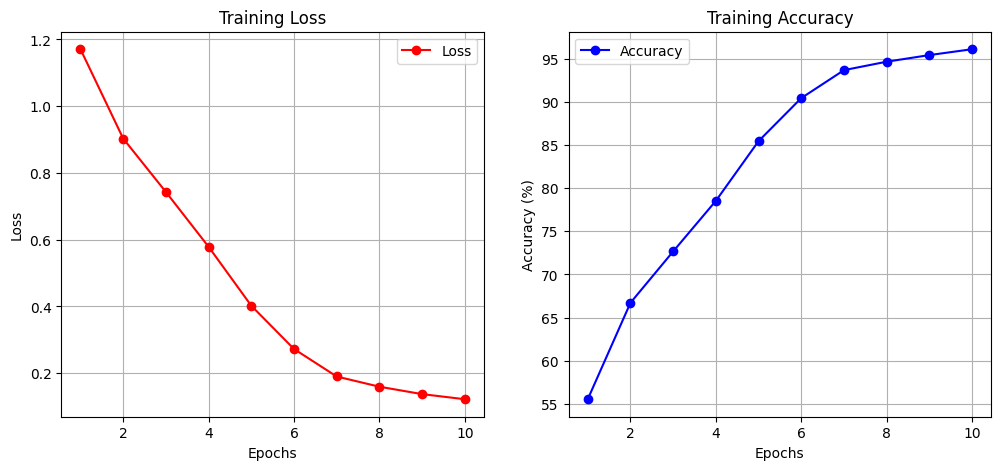

In [ ]:
def plot_training_curves(train_losses, train_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, marker='o', linestyle='-', color='r', label='Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.grid()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Training Accuracy')
    plt.legend()
    plt.grid()

    plt.show()

# Call the function to plot graphs
plot_training_curves(train_losses, train_accuracies)


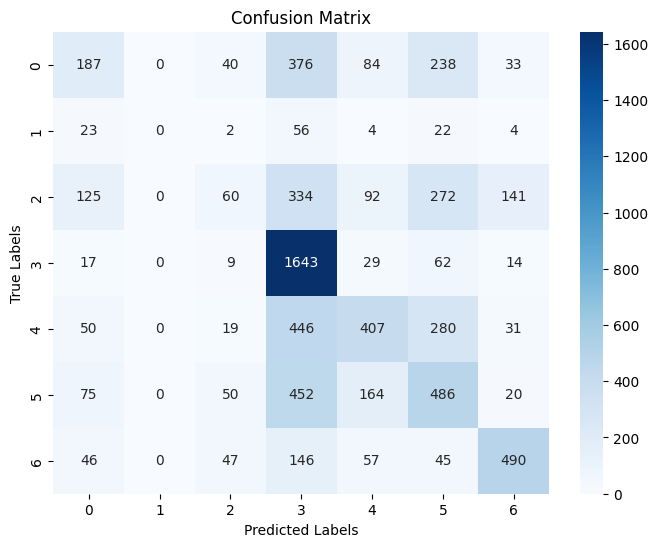

              precision    recall  f1-score   support

           0     0.3576    0.1952    0.2525       958
           1     0.0000    0.0000    0.0000       111
           2     0.2643    0.0586    0.0959      1024
           3     0.4758    0.9262    0.6287      1774
           4     0.4863    0.3301    0.3932      1233
           5     0.3459    0.3897    0.3665      1247
           6     0.6685    0.5897    0.6266       831

    accuracy                         0.4560      7178
   macro avg     0.3712    0.3556    0.3376      7178
weighted avg     0.4240    0.4560    0.4065      7178



In [282]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Ensure model is in evaluation mode
model.eval()

true_labels = []
predicted_labels = []

# No gradient calculation needed for evaluation
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move to MPS
        
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)  # Get class with highest score
        
        true_labels.extend(labels.cpu().numpy())  # Convert tensors to numpy
        predicted_labels.extend(predicted.cpu().numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(7), yticklabels=range(7))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_labels, predicted_labels, digits=4))


In [ ]:
# Save the trained model
torch.save(model.state_dict(), "resnet50_fer2013_mps.pth")

# Test accuracy
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 65.27%


In [243]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [244]:
paths = []
labels = []
for dirname, _, filenames in os.walk(r'/Users/prithvipandey/Downloads/archive/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [245]:
len(paths)

5602

In [246]:
paths[:5]

['/Users/prithvipandey/Downloads/archive/TESS Toronto emotional speech set data/.DS_Store',
 '/Users/prithvipandey/Downloads/archive/TESS Toronto emotional speech set data/YAF_disgust/YAF_date_disgust.wav',
 '/Users/prithvipandey/Downloads/archive/TESS Toronto emotional speech set data/YAF_disgust/YAF_rag_disgust.wav',
 '/Users/prithvipandey/Downloads/archive/TESS Toronto emotional speech set data/YAF_disgust/YAF_raise_disgust.wav',
 '/Users/prithvipandey/Downloads/archive/TESS Toronto emotional speech set data/YAF_disgust/YAF_ditch_disgust.wav']

In [247]:
labels[:5]

['store', 'disgust', 'disgust', 'disgust', 'disgust']

In [260]:
df.columns = df.columns.str.strip()


In [283]:
df['label'] = df['label'].str.strip().str.lower()


In [284]:
df = df[df['label'] != 'store'].reset_index(drop=True)


In [285]:
print(df['label'].value_counts())

label
disgust    800
ps         800
happy      800
sad        800
neutral    800
fear       800
angry      800
Name: count, dtype: int64


In [251]:
import pandas as pd

In [286]:
print(df['label'].value_counts())
print(df[df['label'] == 'store'])  # should return empty


label
disgust    800
ps         800
happy      800
sad        800
neutral    800
fear       800
angry      800
Name: count, dtype: int64
Empty DataFrame
Columns: [speech, label]
Index: []


In [287]:
# This will reveal invisible characters like \n, spaces, etc.
print(repr(df['label'].unique()))


array(['disgust', 'ps', 'happy', 'sad', 'neutral', 'fear', 'angry'],
      dtype=object)


In [290]:
print("Length of paths:", len(paths))
print("Length of labels:", len(labels))


Length of paths: 5602
Length of labels: 10


In [292]:


# GOOD: 5602 individual labels
labels = ['happy', 'angry', 'angry', ..., 'sad']  # ✅ One for each path


In [293]:
import os

labels = [os.path.basename(os.path.dirname(p)) for p in paths]


In [294]:
df = pd.DataFrame({'speech': paths, 'label': labels})


In [295]:
df['label'] = df['label'].astype(str).str.strip().str.lower()
df = df[~df['label'].str.fullmatch('store')].reset_index(drop=True)


In [296]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/Users/prithvipandey/Downloads/archive/TESS To...,TESS Toronto emotional speech set data
1,/Users/prithvipandey/Downloads/archive/TESS To...,YAF_disgust
2,/Users/prithvipandey/Downloads/archive/TESS To...,YAF_disgust
3,/Users/prithvipandey/Downloads/archive/TESS To...,YAF_disgust
4,/Users/prithvipandey/Downloads/archive/TESS To...,YAF_disgust


In [298]:
print(len(paths))
print(len(labels))


5602
5602


In [299]:
df = pd.DataFrame({
    'speech': paths,
    'label': labels
})


In [300]:
df['label'].value_counts()

label
YAF_disgust                               400
OAF_Pleasant_surprise                     400
OAF_happy                                 400
YAF_sad                                   400
YAF_happy                                 400
YAF_neutral                               400
OAF_Fear                                  400
OAF_angry                                 400
YAF_pleasant_surprised                    400
YAF_fear                                  400
OAF_neutral                               400
OAF_disgust                               400
YAF_angry                                 400
OAF_Sad                                   400
TESS Toronto emotional speech set data      2
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

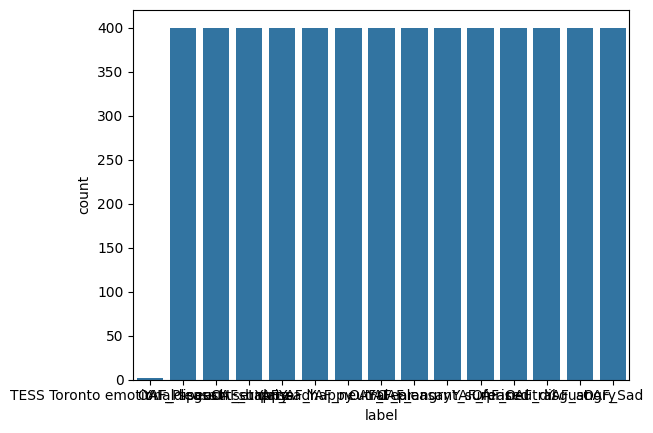

In [301]:
sns.countplot(data=df, x='label')

In [303]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [304]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

IndexError: index 0 is out of bounds for axis 0 with size 0

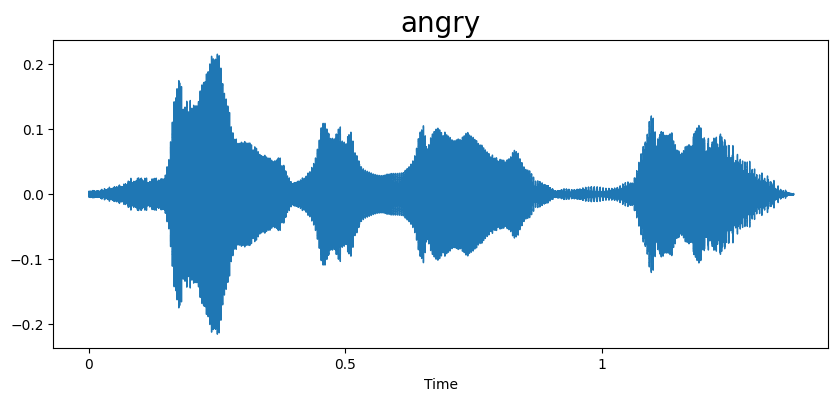

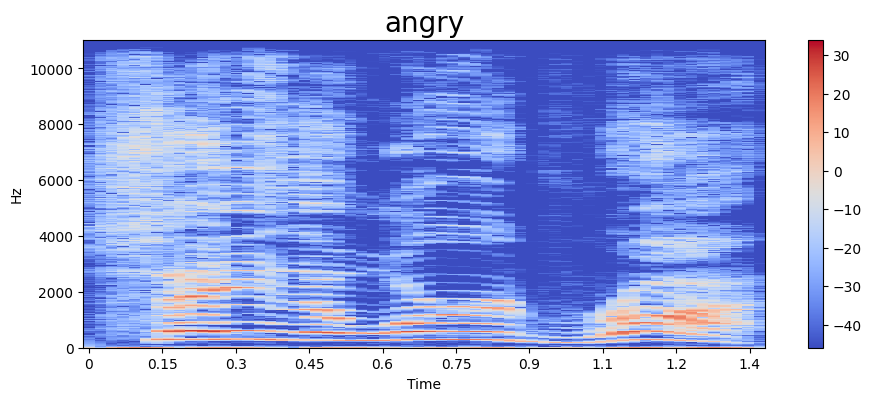

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

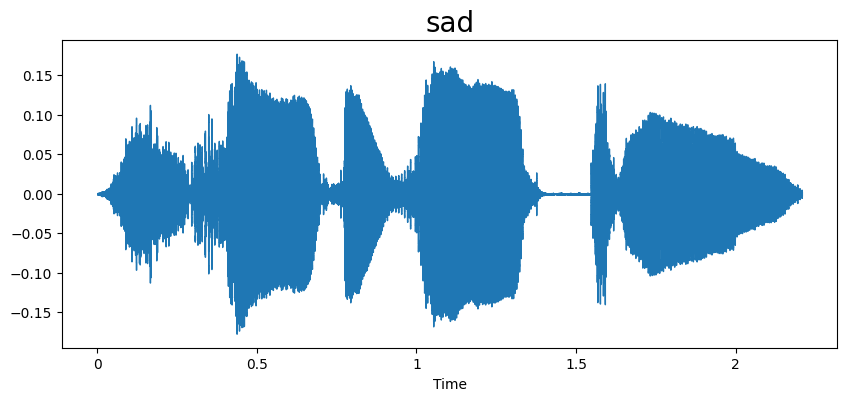

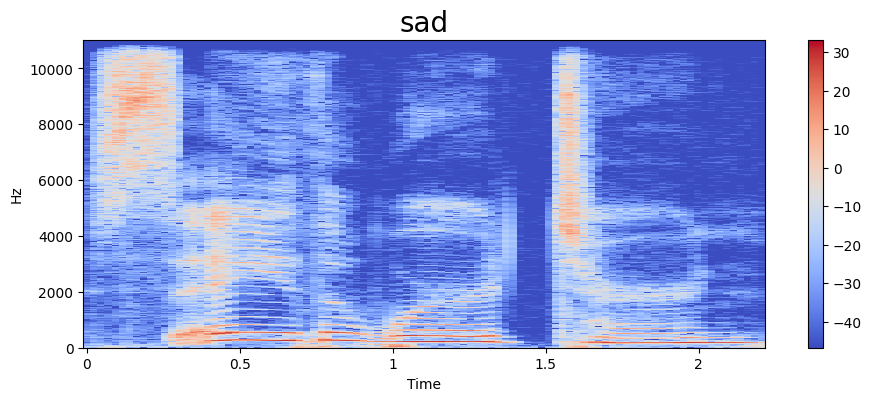

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

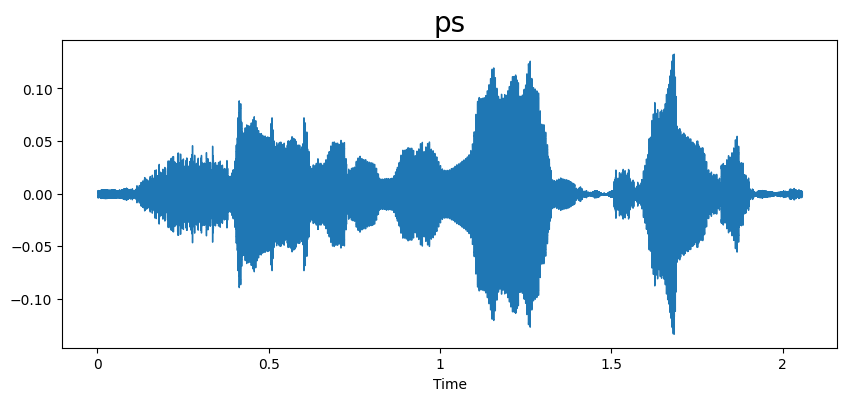

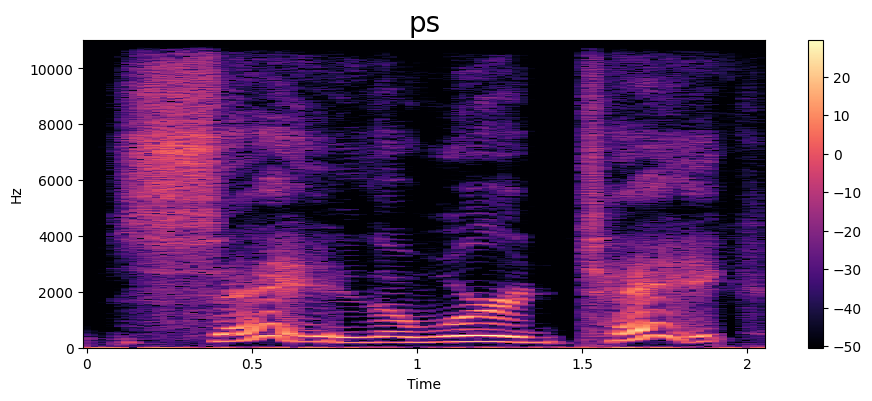

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

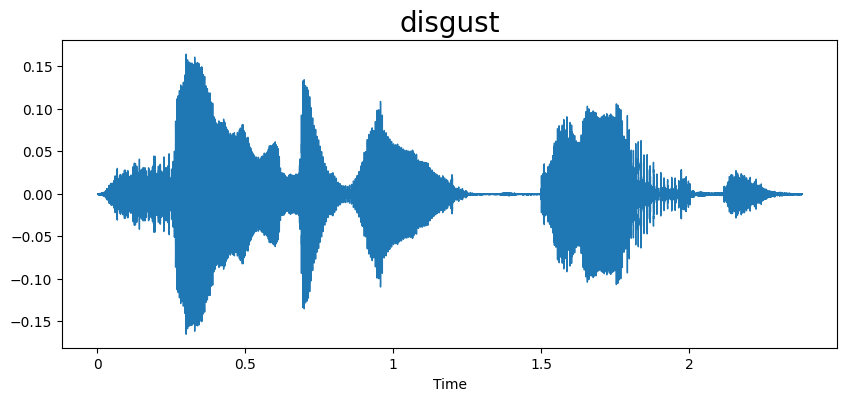

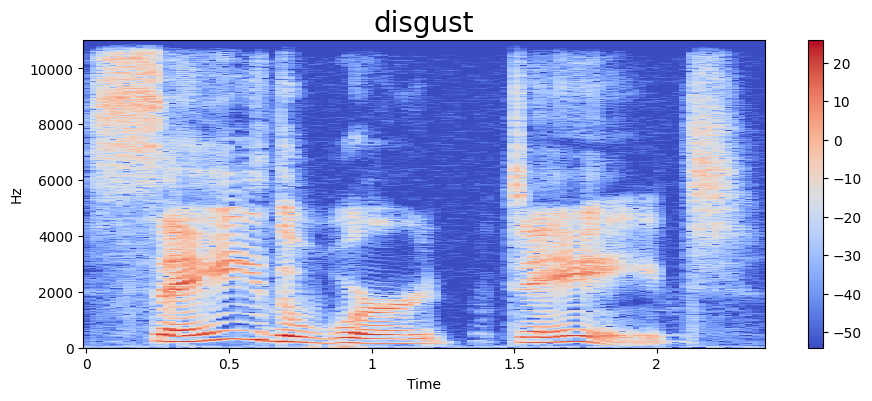

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

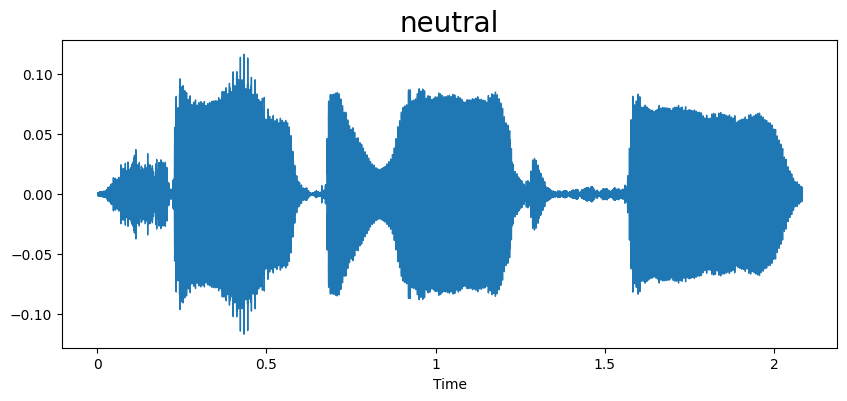

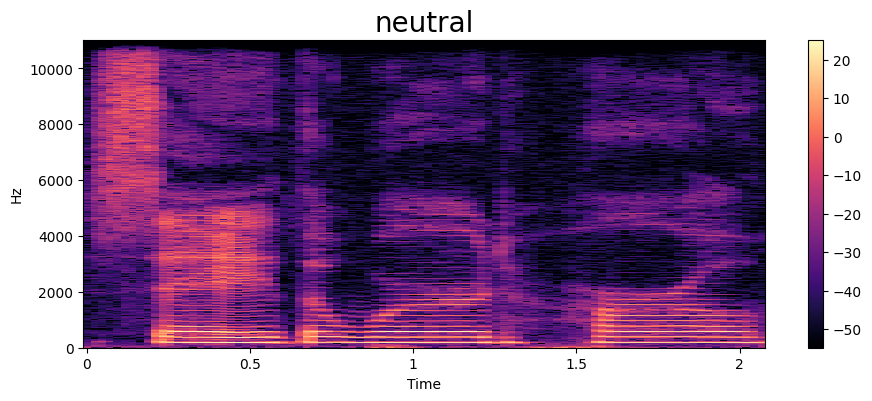

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

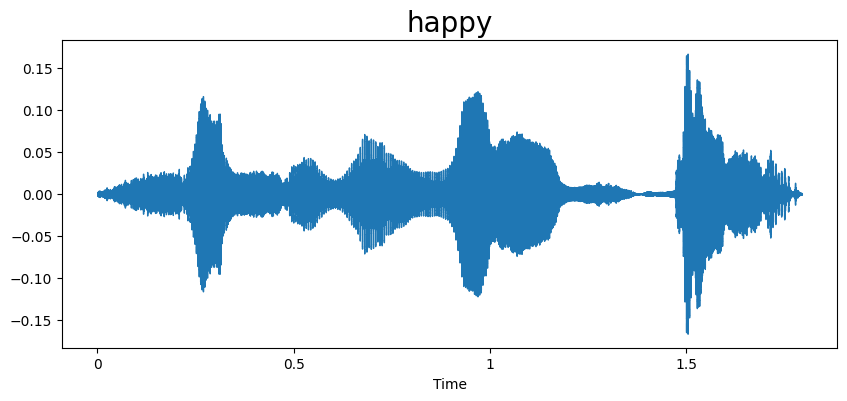

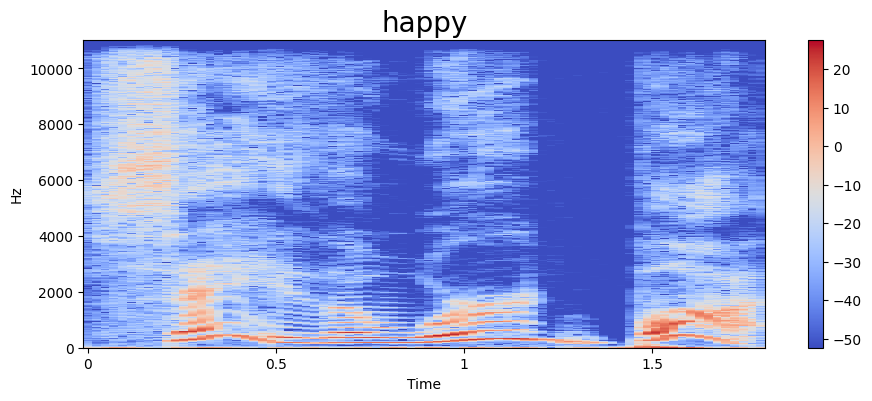

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os

audio_folder = "/Users/prithvipandey/Downloads/archive/TESS Toronto emotional speech set data"
audio_files = [f for f in os.listdir(audio_folder) if f.endswith(('.wav', '.mp3'))]


In [ ]:
import os

file_path = "your_audio_file.wav"

if os.path.exists(file_path):
    print("File exists")
else:
    print("File not found!")


File not found!


In [ ]:
pip install soundfile audioread ffmpeg


  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6081 sha256=1799931554c950447469086c576483df5c284ea43baf1dced096ef5cc11adc96
  Stored in directory: /Users/prithvipandey/Library/Caches/pip/wheels/56/30/c5/576bdd729f3bc062d62a551be7fefd6ed2f761901568171e4e
Successfully built ffmpeg
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
os.system("brew install ffmpeg")  # For macOS



==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
ente-cli
==> New Casks
vesktop



==> Downloading https://ghcr.io/v2/homebrew/core/ffmpeg/manifests/7.1.1_1
==> Fetching dependencies for ffmpeg: brotli, giflib, highway, imath, jpeg-turbo, libpng, xz, lz4, zstd, libtiff, little-cms2, libdeflate, openexr, webp, jpeg-xl, libvmaf, aom, aribb24, dav1d, freetype, fontconfig, frei0r, ca-certificates, gmp, libunistring, gettext, libidn2, libtasn1, nettle, p11-kit, openssl@3, libevent, libnghttp2, unbound, gnutls, pcre2, glib, xorgproto, libxau, libxdmcp, libxcb, libx11, libxext, libxrender, lzo, pixman, cairo, graphite2, icu4c@77, harfbuzz, fribidi, libunibreak, libass, libbluray, cjson, libmicrohttpd, mbedtls, librist, libsoxr, libssh, libvidstab, libvpx, opencore-amr, openjpeg, rav1e, libsamplerate, rubberband, sdl2, snappy, speex, srt, svt-av1, leptonica, libb2, libarchive, pango, tesseract, theora, x264, x265, xvid, libsodium, zeromq and zimg
==> Downloading https://ghcr.io/v2/homebrew/core/brotli/manifests/1.1.0-2
==> Fetching brotli
==> Downloading https://ghcr.io/v2/h

0

In [ ]:
pip install --upgrade librosa


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import librosa
import numpy as np
import os

def extract_mfcc(filename):
    if not os.path.exists(filename):
        raise FileNotFoundError(f"File not found: {filename}")

    try:
        y, sr = librosa.load(filename, duration=3, offset=0.5)
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
        return mfcc
    except Exception as e:
        print(f"Error loading file {filename}: {e}")
        return None


In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-446.368, 73.78931, 1.5521727, 40.626896, -8....
1       [-383.37564, 108.15568, -17.578175, 15.888096,...
2       [-404.0382, 87.21107, 0.48702008, 22.224413, -...
3       [-444.80597, 67.52622, -3.8089025, 31.318571, ...
4       [-430.4275, 118.75985, 6.965281, 5.2049303, -8...
                              ...                        
5595    [-574.78253, 95.66922, 34.851234, 16.82163, 17...
5596    [-557.92706, 89.87658, 33.661488, 15.339763, 2...
5597    [-527.0877, 115.282486, 26.17239, 7.6268435, 1...
5598    [-560.78094, 121.28373, 40.302494, -1.9568814,...
5599    [-552.6838, 106.72335, 35.172695, 8.060719, 22...
Name: speech, Length: 5600, dtype: object

In [ ]:
for i, x in enumerate(X_mfcc[:10]):  # Check the first 10 elements
    if x is None:
        print(f"Warning: Sample {i} is None")
    else:
        print(f"Sample {i} shape: {np.array(x).shape}")


Sample 0 shape: (40,)
Sample 1 shape: (40,)
Sample 2 shape: (40,)
Sample 3 shape: (40,)
Sample 4 shape: (40,)
Sample 5 shape: (40,)
Sample 6 shape: (40,)
Sample 7 shape: (40,)
Sample 8 shape: (40,)
Sample 9 shape: (40,)


In [ ]:
X_mfcc = [x for x in X_mfcc if x is not None]  # Remove None values


In [ ]:
fixed_length = 40  # Ensure all feature vectors have 40 coefficients

X_padded = [np.pad(x, (0, max(0, fixed_length - len(x))), mode='constant')[:fixed_length] for x in X_mfcc]
X = np.array(X_padded)

print(X.shape)  # Should print (number_of_samples, 40)


(5600, 40)


In [ ]:
def extract_mfcc(filename):
    import librosa
    import numpy as np
    import os

    if not os.path.exists(filename):
        print(f"File not found: {filename}")
        return None  # Return None if file is missing

    try:
        y, sr = librosa.load(filename, duration=3, offset=0.5)
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
        return mfcc
    except Exception as e:
        print(f"Error extracting MFCC from {filename}: {e}")
        return None  # Return None if extraction fails


In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(5600, 7)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                  │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(X.shape, y_categorical.shape)


(5600, 40, 1) (5600, 7)


In [ ]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(labels)
y_categorical = to_categorical(y_encoded)

In [ ]:
# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y_categorical, test_size=0.2, random_state=42)


In [ ]:
from keras.utils import to_categorical


num_classes = len(np.unique(y))  # ✅ Correct way to count unique classes
y_categorical = to_categorical(y, num_classes=num_classes)

In [ ]:
from keras.utils import to_categorical
import numpy as np

num_classes = len(np.unique(y))  # Count unique labels correctly
y_categorical = to_categorical(y, num_classes=num_classes)

print("y_categorical shape:", y_categorical.shape)  # Should be (samples, num_classes)


y_categorical shape: (5600, 7)


In [ ]:
X.shape

(5600, 40, 1)

In [ ]:
import numpy as np
from keras.utils import to_categorical

# If y is sparse or one-hot encoded, bring it back to class indices first
if hasattr(y, 'toarray'):
    y = y.toarray()

if len(y.shape) > 1:  # already one-hot
    y = np.argmax(y, axis=1)

# Now apply to_categorical
num_classes = len(np.unique(y))
y_categorical = to_categorical(y, num_classes=num_classes)


In [ ]:
print("X shape:", X.shape)
print("y_categorical shape:", y_categorical.shape)


X shape: (5600, 40, 1)
y_categorical shape: (5600, 7)


In [ ]:
assert X.shape[0] == y_categorical.shape[0], "Mismatched number of samples!"


In [272]:
import tensorflow as tf


In [271]:
# Train the model
history = model.fit(X, y_categorical, validation_split=0.2, epochs=50, batch_size=64)

AttributeError: 'ResNet' object has no attribute 'fit'

In [ ]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense = tf.keras.layers.Dense(64)

    def call(self, inputs):
        return self.dense(inputs)


NameError: name 'tf' is not defined

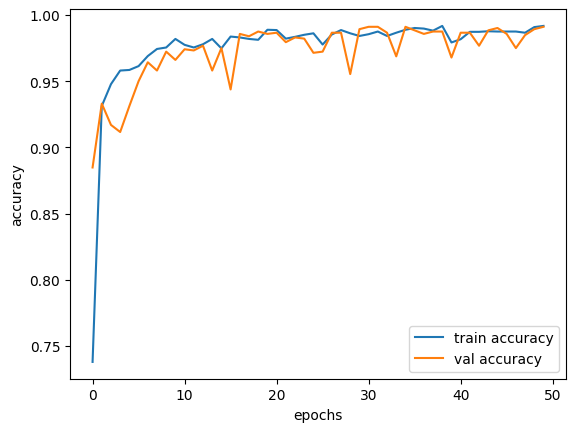

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

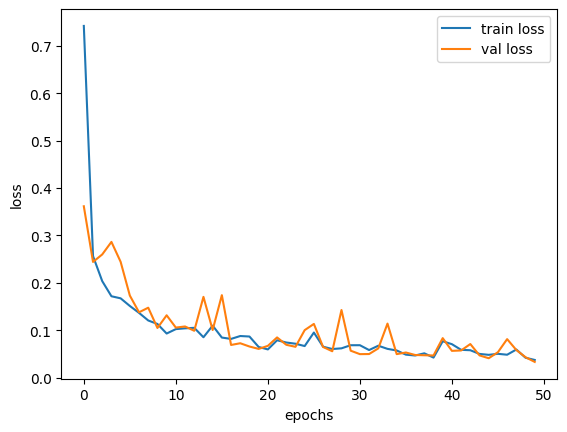

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")

ValueError: Found input variables with inconsistent numbers of samples: [5600, 5602]

In [ ]:
print(X.shape, y.shape)


(5600, 40, 1) (5602, 8)


In [ ]:
y = y[:5600]
print(X.shape, y.shape)  # Should now be (5600, 40, 1) and (5600, 8)


(5600, 40, 1) (5600, 8)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")


Training data shape: (4480, 40, 1), (4480, 8)
Validation data shape: (1120, 40, 1), (1120, 8)


In [ ]:
# Make predictions on the validation set
predictions = model.predict(X_val)
predicted_labels = np.argmax(predictions, axis=1)

# Decode the predictions back to labels
true_labels = np.argmax(y_val, axis=1)
decoded_predictions = encoder.inverse_transform(predicted_labels)
decoded_true_labels = encoder.inverse_transform(true_labels)

# Print some predictions vs actual labels
for i in range(5):
    print(f"Actual: {decoded_true_labels[i]}, Predicted: {decoded_predictions[i]}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Actual: fear, Predicted: fear
Actual: angry, Predicted: angry
Actual: fear, Predicted: fear
Actual: ps, Predicted: ps
Actual: disgust, Predicted: disgust


In [ ]:
import numpy as np

print("Unique true labels:", np.unique(true_labels))
print("Unique predicted labels:", np.unique(predicted_labels))
print("Encoder classes:", encoder.classes_)


Unique true labels: [0 1 2 3 4 5 6]
Unique predicted labels: [0 1 2 3 4 5 6]
Encoder classes: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'ps' 'sad' 'store']


In [ ]:
from sklearn.metrics import classification_report

# Get unique predicted classes
predicted_classes = np.unique(predicted_labels)

# Filter out missing class from target names
filtered_target_names = [name for i, name in enumerate(encoder.classes_) if i in predicted_classes]

# Generate classification report with filtered target names
print(classification_report(true_labels, predicted_labels, target_names=filtered_target_names))


              precision    recall  f1-score   support

       angry       1.00      0.99      0.99       167
     disgust       0.99      1.00      0.99       155
        fear       0.99      1.00      1.00       147
       happy       1.00      0.99      1.00       169
     neutral       0.99      0.99      0.99       150
          ps       1.00      0.99      1.00       168
         sad       0.99      0.99      0.99       164

    accuracy                           0.99      1120
   macro avg       0.99      0.99      0.99      1120
weighted avg       0.99      0.99      0.99      1120



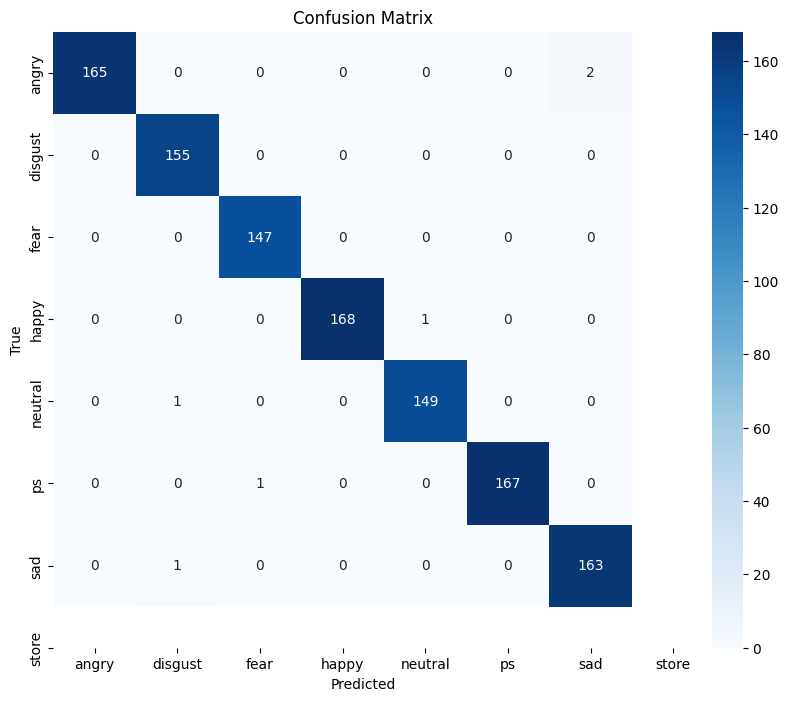

In [ ]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import torch.nn as nn

class AudioLSTM(nn.Module):
    def __init__(self):
        super(AudioLSTM, self).__init__()
        self.lstm1 = nn.LSTM(input_size=1, hidden_size=256, batch_first=True, dropout=0.2, num_layers=1)
        self.lstm2 = nn.LSTM(input_size=256, hidden_size=128, batch_first=True, dropout=0.2, num_layers=1)
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(128, 64)

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x = x[:, -1, :]  # Get last time step
        x = self.dropout(torch.relu(self.fc1(x)))
        return x  # feature vector


In [ ]:
class ImageResNet(nn.Module):
    def __init__(self):
        super(ImageResNet, self).__init__()
        base_model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-1])  # Remove FC layer

    def forward(self, x):
        x = self.feature_extractor(x)
        return x.view(x.size(0), -1)  # Flatten (B, 2048)


In [305]:
class MultimodalFusion(nn.Module):
    def __init__(self):
        super(MultimodalFusion, self).__init__()
        self.image_model = ImageResNet()
        self.audio_model = AudioLSTM()

        self.fusion_fc = nn.Sequential(
            nn.Linear(2048 + 64, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 7)  # Or 8 depending on your target class setup
        )

    def forward(self, image_input, audio_input):
        img_feat = self.image_model(image_input)
        aud_feat = self.audio_model(audio_input)
        combined = torch.cat((img_feat, aud_feat), dim=1)
        output = self.fusion_fc(combined)
        return output


In [ ]:
def train_fusion_model(model, dataloader, optimizer, loss_fn, device, num_epochs=10):
    model.train()
    train_losses = []
    train_accuracies = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct, total = 0, 0

        for image_inputs, audio_inputs, labels in dataloader:
            image_inputs = image_inputs.to(device)
            audio_inputs = audio_inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(image_inputs, audio_inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / len(dataloader)
        epoch_acc = 100 * correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f"Epoch {epoch+1}/{num_epochs}: Loss = {epoch_loss:.4f}, Accuracy = {epoch_acc:.2f}%")

    return train_losses, train_accuracies


In [ ]:
model = MultimodalFusion().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
loss_fn = nn.CrossEntropyLoss()

# Train
train_losses, train_accuracies = train_fusion_model(
    model, train_loader, optimizer, loss_fn, device, num_epochs=10
)


ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
for batch in train_loader:
    print(type(batch), len(batch))
    break


<class 'list'> 2


In [ ]:
print(batch)


[tensor([[[[ 0.0588,  0.0588,  0.0353,  ..., -0.9373, -0.9451, -0.9451],
          [ 0.0588,  0.0588,  0.0353,  ..., -0.9373, -0.9451, -0.9451],
          [ 0.0431,  0.0431,  0.0196,  ..., -0.9373, -0.9451, -0.9451],
          ...,
          [ 0.1373,  0.1373,  0.1294,  ..., -0.5765, -0.5765, -0.5765],
          [ 0.1373,  0.1373,  0.1294,  ..., -0.5765, -0.5765, -0.5765],
          [ 0.1373,  0.1373,  0.1294,  ..., -0.5765, -0.5765, -0.5765]],

         [[ 0.0588,  0.0588,  0.0353,  ..., -0.9373, -0.9451, -0.9451],
          [ 0.0588,  0.0588,  0.0353,  ..., -0.9373, -0.9451, -0.9451],
          [ 0.0431,  0.0431,  0.0196,  ..., -0.9373, -0.9451, -0.9451],
          ...,
          [ 0.1373,  0.1373,  0.1294,  ..., -0.5765, -0.5765, -0.5765],
          [ 0.1373,  0.1373,  0.1294,  ..., -0.5765, -0.5765, -0.5765],
          [ 0.1373,  0.1373,  0.1294,  ..., -0.5765, -0.5765, -0.5765]],

         [[ 0.0588,  0.0588,  0.0353,  ..., -0.9373, -0.9451, -0.9451],
          [ 0.0588,  0.0588, 

In [ ]:
image_inputs, audio_inputs = batch[0]
labels = batch[1]


ValueError: too many values to unpack (expected 2)

In [ ]:
batch = next(iter(train_loader))
print(type(batch))
print(len(batch))
print(batch)


<class 'list'>
2
[tensor([[[[-1.0000, -1.0000, -1.0000,  ...,  0.4667,  0.4667,  0.4667],
          [-1.0000, -1.0000, -1.0000,  ...,  0.4667,  0.4667,  0.4667],
          [-1.0000, -1.0000, -1.0000,  ...,  0.4667,  0.4667,  0.4667],
          ...,
          [-1.0000, -1.0000, -1.0000,  ...,  0.5922,  0.5922,  0.5922],
          [-1.0000, -1.0000, -1.0000,  ...,  0.5922,  0.5922,  0.5922],
          [-1.0000, -1.0000, -1.0000,  ...,  0.5922,  0.5922,  0.5922]],

         [[-1.0000, -1.0000, -1.0000,  ...,  0.4667,  0.4667,  0.4667],
          [-1.0000, -1.0000, -1.0000,  ...,  0.4667,  0.4667,  0.4667],
          [-1.0000, -1.0000, -1.0000,  ...,  0.4667,  0.4667,  0.4667],
          ...,
          [-1.0000, -1.0000, -1.0000,  ...,  0.5922,  0.5922,  0.5922],
          [-1.0000, -1.0000, -1.0000,  ...,  0.5922,  0.5922,  0.5922],
          [-1.0000, -1.0000, -1.0000,  ...,  0.5922,  0.5922,  0.5922]],

         [[-1.0000, -1.0000, -1.0000,  ...,  0.4667,  0.4667,  0.4667],
          [-

In [ ]:
transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])


Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])

In [ ]:
images, labels = next(iter(train_loader))
print(images.shape)  # torch.Size([batch_size, 3, 48, 48])
print(labels.shape)  # torch.Size([batch_size])


torch.Size([32, 3, 224, 224])
torch.Size([32])


In [ ]:
def __getitem__(self, idx):
    image = self.image_data[idx]           # e.g., Tensor
    audio = self.audio_data[idx]           # e.g., Tensor
    label = self.labels[idx]               # e.g., int or tensor
    return image, audio, label


In [ ]:
for batch in train_loader:
    print(f"Batch length: {len(batch)}")
    break


Batch length: 2


In [ ]:
from torch.utils.data import Dataset


In [ ]:
from torch.utils.data import Dataset

class FusionDataset(Dataset):
    def __init__(self, image_data, audio_data, labels):
        self.image_data = image_data
        self.audio_data = audio_data
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.image_data[idx], self.audio_data[idx], self.labels[idx]


In [ ]:
class FusionDataset(Dataset):
    def __init__(self, image_data, audio_data, labels):
        self.image_data = image_data
        self.audio_data = audio_data
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.image_data[idx], self.audio_data[idx], self.labels[idx]


In [ ]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import pandas as pd
import torchaudio

class FusionDataset(Dataset):
    def __init__(self, image_root, tess_csv, transform=None, sample_limit_per_class=500):
        self.image_root = image_root
        self.tess_df = pd.read_csv(tess_csv)
        self.transform = transform

        # Get image paths and their labels
        self.image_paths = []
        self.image_labels = []

        emotion_folders = os.listdir(image_root)
        for emotion in emotion_folders:
            emotion_folder = os.path.join(image_root, emotion)
            if os.path.isdir(emotion_folder):
                for img_file in os.listdir(emotion_folder)[:sample_limit_per_class]:
                    self.image_paths.append(os.path.join(emotion_folder, img_file))
                    self.image_labels.append(emotion.lower())

        # Match TESS audio with same emotion label (lowercase for consistency)
        self.audio_df = self.tess_df[self.tess_df['emotion'].str.lower().isin(set(self.image_labels))]

        # Ensure length consistency
        self.length = min(len(self.image_paths), len(self.audio_df))
        self.audio_df = self.audio_df.sample(n=self.length).reset_index(drop=True)

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        # Load image
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        label = self.image_labels[idx]

        # Load audio (assume mono wav files)
        audio_path = self.audio_df.loc[idx, 'filepath']
        waveform, sample_rate = torchaudio.load(audio_path)
        waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)
        audio = waveform.mean(dim=0)  # Convert to mono

        # Map label to int
        emotion_to_idx = {emotion: idx for idx, emotion in enumerate(sorted(set(self.image_labels)))}
        label_tensor = torch.tensor(emotion_to_idx[label])

        return image, audio, label_tensor


In [ ]:
transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = FusionDataset(
    image_root='/Users/prithvipandey/Documents/dataset/archive (1) 2',  # FER2013 image dir
    tess_csv='tess_features.csv',
    transform=transform
)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)


ValueError: num_samples should be a positive integer value, but got num_samples=0

In [ ]:
import os
import librosa
import pandas as pd
import numpy as np

# Path to TESS dataset folder
tess_path = '/Users/prithvipandey/Downloads/archive/TESS Toronto emotional speech set data'

# Emotions to keep (mapping for FER2013 if needed)
emotion_map = {
    'angry': 'angry',
    'disgust': 'disgust',
    'fear': 'fear',
    'happy': 'happy',
    'neutral': 'neutral',
    'ps': 'surprise',  # Sometimes "pleasant surprise" is written as "ps"
    'sad': 'sad'
}

data = []

for root, dirs, files in os.walk(tess_path):
    for file in files:
        if file.endswith(".wav"):
            emotion_label = None
            for key in emotion_map:
                if key in file.lower():
                    emotion_label = emotion_map[key]
                    break
            if emotion_label is None:
                continue

            file_path = os.path.join(root, file)

            # Load audio
            try:
                y, sr = librosa.load(file_path, sr=None)
                # Extract MFCCs
                mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
                mfcc_mean = np.mean(mfcc.T, axis=0)  # Average across time axis
                row = [file_path, emotion_label] + mfcc_mean.tolist()
                data.append(row)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

# Create DataFrame
columns = ['filename', 'emotion'] + [f'mfcc_{i}' for i in range(40)]
df = pd.DataFrame(data, columns=columns)

# Save to CSV
df.to_csv('tess_features.csv', index=False)

print("Saved TESS MFCC features to tess_features.csv")


Saved TESS MFCC features to tess_features.csv


In [ ]:
print(df.columns)


Index(['speech', 'label'], dtype='object')


In [175]:
df = df[df['label'] != 'store'].reset_index(drop=True)


In [176]:
print(df['label'].value_counts())


label
disgust    800
ps         800
happy      800
sad        800
neutral    800
fear       800
angry      800
Name: count, dtype: int64
